In [1]:
import os, sys
os.chdir('/home/inarighas/Projects/voice-transcript')
import pandas as pd
import numpy as np
import librosa
from bs4 import BeautifulSoup
from app.main import process_transcription

import json
import wave
import contextlib
import fastwer

/home/inarighas/Projects/voice-transcript/.venv/lib64/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
torchvision is not available - cannot save figures
speechbrain.lobes.models.huggingface_wav2vec - wav2vec 2.0 is frozen.


In [2]:
root_folder = '../voice-features/eval/data/ParoleParisContemporain/'
folder = 'record-28'

In [3]:
# res = []
# for folder in os.listdir(root_folder)[:1]:
#     if folder.startswith("record"):
#         print(folder)
#         list_files = os.listdir(root_folder + folder)
#         for f in list_files:
#             if f.endswith('.trs'):
#                 with open(os.path.join(root_folder, folder, f), 'tr') as tmp:
#                     data = tmp.read()
#                 bs_data = BeautifulSoup(data, 'xml')
#                 speakers = bs_data.find("Speakers")
#                 list_speakers = [s.get('id') for s in speakers if len(s)==0]
#                 timestamps = {s: [] for s in list_speakers}
#                 for s in list_speakers:
#                     for tag in bs_data.find_all('Turn', {'speaker':s}):
#                         tmp = tag.attrs
#                         tmp["text"] = tag.text.replace("\n", "")
#                         res.append(tmp)

In [4]:
# with open(os.path.join(root_folder, folder, "transcript.json"), 'w', encoding='utf8') as f:
#     json.dump(res, f, indent=2, ensure_ascii=False)

In [20]:
with open(os.path.join(root_folder, folder, "transcript.json"), 'r') as f:
    d = json.load(f)

In [21]:
target_sr = 8000
name = os.path.join(root_folder, folder, "single_spk1.wav")
arr, sr =  librosa.load(name)
    # get list of audio(31.2*sr)]
    # list_audio = [np.array(audio[i:i + sr*60]) for i in range(0, audio.shape[0], sr*60)]
    # for idx, audio in enumerate(list_audio):
    # Run transcript for each audio subsample:
    # save retext, dur = process_transcription(arr, sr)sults


In [ ]:
offset = 0
for item in d:
    length = float(item['endTime']) - float(item['startTime'])
    speech_array = librosa.resample(arr[offset: offset + int(length*sr)],
                                    orig_sr=sr,
                                    target_sr=target_sr,
                                    res_type="kaiser_fast"
                                    )
    text, dur = process_transcription(speech_array, target_sr)
    item['model'] = text
    # print(f"Offset: {offset} ---- Length: {int(length*sr)}")
    offset = offset + int(length*sr)

In [24]:
import json
with open(os.path.join(root_folder, folder, "res_transcript.json"), 'w', encoding='utf8') as f:
    json.dump(d, f, indent=2, ensure_ascii=False)

In [3]:
with open(os.path.join(root_folder, folder, "res_transcript.json"), 'r') as f:
    d = json.load(f)

In [6]:
ref_list = []
mod_list = []
for idx, i in enumerate(d):
    try:
        mod_list.append(i['model'])
        ref_list.append(i['text'])
    except KeyError:
        print(f"Line {idx}: unfound transcript")
    

Line 192: unfound transcript
Line 193: unfound transcript
Line 194: unfound transcript
Line 195: unfound transcript
Line 196: unfound transcript
Line 197: unfound transcript
Line 198: unfound transcript
Line 199: unfound transcript
Line 200: unfound transcript
Line 201: unfound transcript
Line 202: unfound transcript
Line 203: unfound transcript
Line 204: unfound transcript
Line 205: unfound transcript
Line 206: unfound transcript
Line 207: unfound transcript
Line 208: unfound transcript
Line 209: unfound transcript
Line 210: unfound transcript
Line 211: unfound transcript
Line 212: unfound transcript
Line 213: unfound transcript
Line 214: unfound transcript
Line 215: unfound transcript
Line 216: unfound transcript
Line 217: unfound transcript
Line 218: unfound transcript
Line 219: unfound transcript
Line 220: unfound transcript
Line 221: unfound transcript
Line 222: unfound transcript
Line 223: unfound transcript
Line 224: unfound transcript
Line 225: unfound transcript
Line 226: unfo

In [8]:
len(mod_list)

192

In [33]:
wer_lst = [fastwer.score_sent(m, r) for m, r in zip(mod_list, ref_list)]
cer_lst = [fastwer.score_sent(m, r, char_level=True) for m, r in zip(mod_list, ref_list)]

print('\n---------------------------------------------------')
print(f"Sentence level WER: \t avg {np.array(wer_lst).mean():.2f} (std {np.array(wer_lst).std():.2f})")
print(f"Corpus level WER: \t {fastwer.score(mod_list, ref_list, char_level=False):.2f}")
print('---------------------------------------------------')
print(f"Sentence level CER: \t avg {np.array(cer_lst).mean():.2f} (std {np.array(cer_lst).std():.2f})")
print(f"Corpus level CER: \t {fastwer.score(mod_list, ref_list, char_level=True):.2f}")


---------------------------------------------------
Sentence level WER: 	 avg 45.86 (std 32.95)
Corpus level WER: 	 43.47
---------------------------------------------------
Sentence level CER: 	 avg 29.78 (std 30.69)
Corpus level CER: 	 19.35


<AxesSubplot:ylabel='Count'>

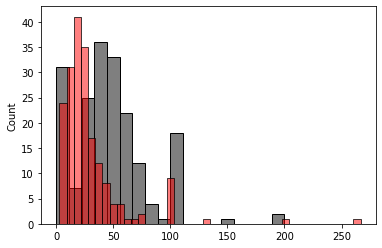

In [46]:
import seaborn as sns
sns.histplot(wer_lst, color='k', alpha=.5)
sns.histplot(cer_lst, color='red', alpha=.5)